In [1]:
import deepquantum as dq
import torch
import torch.nn as nn
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

## Single qubit operation $HR_z(-\alpha)|+\rangle$ in measurement based quantum computation(MBQC)

Matrix representation for $R_z(\alpha)$ and $|+>$ state
$$ R_z(\alpha)=
\begin{pmatrix}
e^{-i\alpha/2}&0\\
0&e^{i\alpha/2}\\
\end{pmatrix}\\
|+>=\frac{\sqrt{2}}{2}\begin{pmatrix}
1\\
1\\
\end{pmatrix}
$$

$$ R_z(\alpha)|+>=
\frac{\sqrt{2}}{2}\begin{pmatrix}
e^{-i\alpha/2}\\
e^{i\alpha/2}\\
\end{pmatrix}
$$

The following circuits are equivalent
![MBQC example](./Figs/MBQC_figs/RZ.jpg)
<div style="text-align:center">图 1: MBQC实现单比特门$HR_z(-\alpha)|+\rangle$操作</div>

tensor([[-4.3711e-08+1.2345e-08j, -5.6206e-17-1.0000e+00j]])


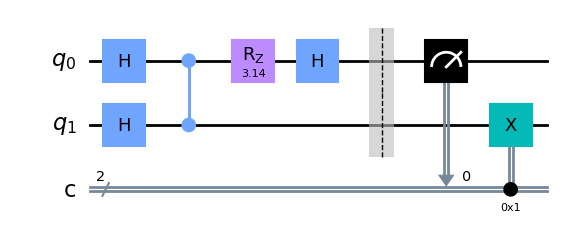

In [2]:
# define the angle of RZ gate
theta = np.pi
qc = dq.QubitCircuit(2)

# prepare cluster state
qc.h(0)
qc.h(1)
qc.cz(0,1)

# apply RZ and Hadamard gate over cluster state
qc.rz(0,theta)
qc.h(0)
qc.barrier()

qc.x(1, controls=0, condition=True)

state_2 = qc()

# check the output state 

print(qc.post_select('1')) # set measure result
qc.draw()

Verify single qubit operation $HR_z(-\alpha)|+\rangle$ in the circuit-based quantum computation(CBCQ)

tensor([[-4.3711e-08+0.0000j],
        [ 0.0000e+00-1.0000j]])


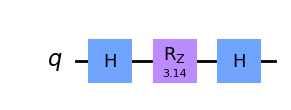

In [6]:
qc1 = dq.QubitCircuit(1)
# prepare state |+>
qc1.h(0)

# implement Rz-gate and H-gate 
qc1.rz(0,theta)
qc1.h(0)

qc1()
state_result = qc1()
print(state_result)
qc1.draw()

## Random single-qubit-rotation gate in measuremnet based quantum computation(MBQC)

对于任意单比特门的实现，采用三个H-Rz gate 级联的形式，最后根据测量结果加上对应的Pauli 修正
![MBQC example](./Figs/MBQC_figs/Single.jpg)
<div style="text-align:center">图 2: MBQC single gate 的实现</div>

tensor([[0.3314-0.4619j, 0.1913-0.8001j]])


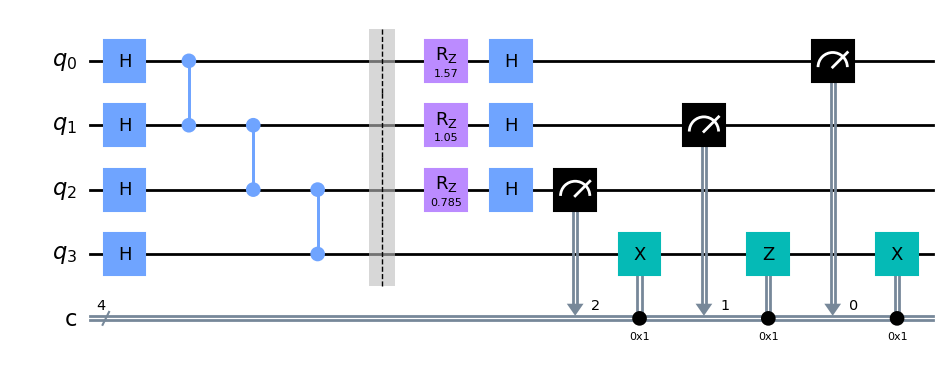

In [4]:
alpha = np.pi/2
beta = np.pi/3
gamma = np.pi/4
qc = dq.QubitCircuit(4, mps=False, chi=2,den_mat=False) 

# prepare cluster state
qc.hlayer(wires=[0, 1, 2, 3])    # + state
qc.cz(0, 1)
qc.cz(1, 2)
qc.cz(2, 3)
qc.barrier()

# measurement
qc.rz(0, alpha)
qc.h(0)
qc.rz(1, beta)
qc.h(1)
qc.rz(2, gamma)
qc.h(2)

qc.x(3, controls=2, condition=True)
qc.z(3, controls=1, condition=True)
qc.x(3, controls=0, condition=True)
q3_state2 = qc()
print(qc.post_select('000')) # set measure result

qc.draw()

Verify random single-qubit-rotation gate  in circuit based quantum computation(CBQC)

tensor([[0.3314-0.4619j],
        [0.1913-0.8001j]])


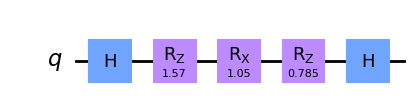

In [7]:
# verify
qc1 = dq.QubitCircuit(1)
qc1.h(0)

# \alpha, \beta, \gamma的正负是根据测量的结果决定的，q0的结果对应rx门的\beta系数正负，为0(1)是正(负)；q1的结果对应第二个rz门的系数
# \gamma的正负，为0是正；\alpha始终保持正号


qc1.rz(0,alpha*(1))
qc1.rx(0,beta*(1)) 
qc1.rz(0,gamma*(1))
qc1.h(0)

qc1()
state_result = qc1()
print(state_result)
qc1.draw()


## CNOT-gate in measuremnet based quantum computation(MBQC)

Matrix representation for CNOT gate
$$ CNOT=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}
=|0><0|\otimes I+|1><1|\otimes X
$$ \
$$
CNOT|++>=|++> \\
CNOT|+->=|--> \\
CNOT|-+>=|-+> \\
CNOT|-->=|+->
$$
![MBQC example](./Figs/MBQC_figs/CNOT.jpg)
<div style="text-align:center">图 3: MBQC CNOT 的实现</div>

tensor([[0.5000+0.j, 0.5000+0.j, 0.5000+0.j, 0.5000+0.j]])


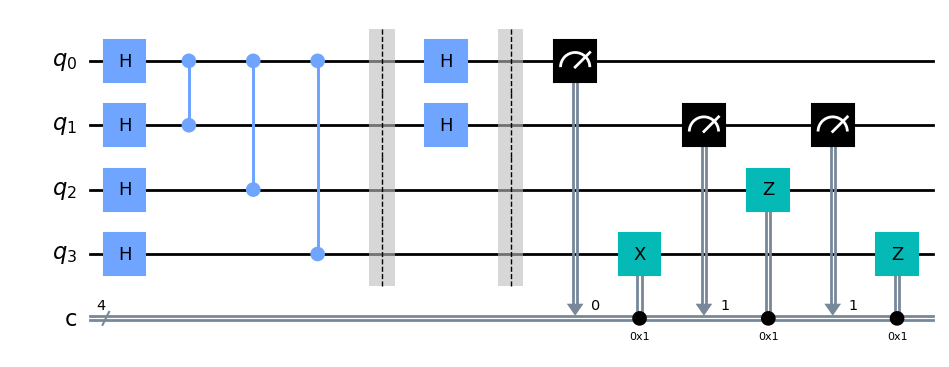

In [6]:
cir = dq.QubitCircuit(4, mps=False, chi=2,den_mat=False) 

# construct cluster state
# cir.x(1)  # input |+>|-> state
# cir.x(2)  # input |->|+> state
cir.hlayer(wires=[0, 1, 2, 3])    # input |+>|+> state
cir.cz(0,1)
cir.cz(0,2)
cir.cz(0,3)
cir.barrier()

# measurement and correction 

cir.h(0)
cir.h(1)
state_1 = cir()   
cir.barrier()

cir.x(3, controls=0, condition=True)
cir.z(2, controls=1, condition=True)
cir.z(3, controls=1, condition=True)

state_2 = cir()

# print(state_2)
print(cir.post_select('10')) # set measure result

cir.draw()

Verify CNOT-gate in circuit based quantum computation(CBQC)

tensor([[0.5000+0.j],
        [0.5000+0.j],
        [0.5000+0.j],
        [0.5000+0.j]])


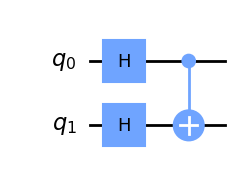

In [8]:
cir1 = dq.QubitCircuit(2, mps=False, chi=2,den_mat=False)
cir1.hlayer(wires=[0, 1]) 
cir1.cx(0,1)
print(cir1())
cir1.draw()